In [1]:
import image_utility
import numpy as np
from pathlib import Path
from pandas import DataFrame


In [2]:
def get_object_pixel_height(
    real_object_height: float, 
    focal_length_35mm: float, 
    pixel_img_height: float, 
    mm_distance: float
) -> int:
    numerator = real_object_height * focal_length_35mm * pixel_img_height
    denominator = mm_distance * 24

    return numerator / denominator

In [3]:
image_width = 4000 # Pixels
image_height = 3000 # Pixels
focal_length_35mm = 15
real_object_height = 700 # Milimeters (70 cm)

result = []

for i in range(1, 101):
    mm_dist = i * 1000
    bbox_height = get_object_pixel_height(real_object_height, focal_length_35mm, image_height, mm_dist)

    for pixel_error in [1, 2, 3, 4, 5]:
        erroneous_object_height = bbox_height + pixel_error
        erroneous_dist = image_utility.get_35mm_distance_to_object(
            real_object_height,
            erroneous_object_height,
            image_height,
            focal_length_35mm
        )

        distance_error = abs(erroneous_dist / 1000 - i)
        
        result.append({
            'distance': i,
            'distance_error': distance_error,
            'error': pixel_error,
            'error_percent': distance_error / i * 100
        })

<AxesSubplot:xlabel='Object Distance', ylabel='Distance Error %'>

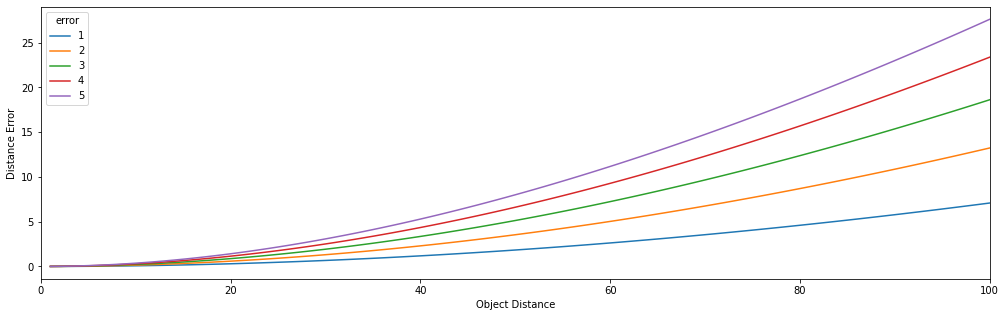

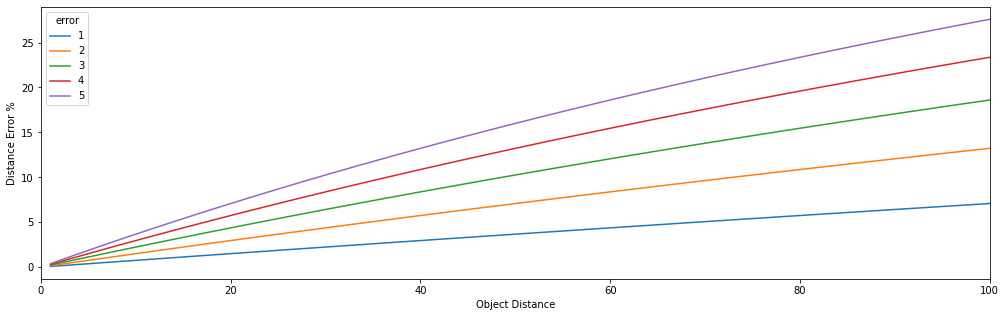

In [4]:
df = DataFrame(result)

df.pivot(index='distance', columns='error', values='distance_error')\
    .plot(xlabel='Object Distance', ylabel='Distance Error', figsize=(17, 5), xlim=(0,100))

df.pivot(index='distance', columns='error', values='error_percent')\
    .plot(xlabel='Object Distance', ylabel='Distance Error %', figsize=(17, 5), xlim=(0,100))

In [5]:
output = Path() / 'output'
df.pivot(index='distance', columns='error', values='distance_error').to_csv(output.joinpath('bbox_error_distance_impact.csv'))